In [4]:
import pandas as pd
import anndata as ad
import numpy as np
import os
import os.path as osp
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt
from PIL import Image

In [1]:
CNTDIR = "/home/alma/w-projects/ccf/data/mb-ad/raw/OFB/Counts/"
IMGDIR = "/home/alma/w-projects/ccf/data/mb-ad/raw/OFB/HE/"
TMATDIR = "/home/alma/Documents/PhD/papers/STSC/rsc/mob_data/tmats"
ODIR = "/home/alma/w-projects/ccf/data/mb-ad/curated/"

In [86]:
name

'polb_rep1'

In [105]:
new_w = 2000
paths = os.listdir(CNTDIR)
for pth in [paths[0]]:
        name = pth.split(".")[0]
        df = pd.read_csv(osp.join(CNTDIR,pth),
                         sep = "\t",
                         header = 0,
                         index_col = 0)
        
        
        var = pd.DataFrame(df.columns.values,
                   index = df.columns,
                   columns = ["gene"]
                  )
        
        obs = pd.DataFrame(df.index.values,
                           index = df.index,
                           columns = ["spot"],
                          )
        
        img = Image.open(osp.join(IMGDIR,name + ".jpg"))
        w,h = img.size
        w_scale = new_w/w
        img = img.resize((int(new_w),int(h*w_scale)))
        #img = img.transpose(Image.FLIP_TOP_BOTTOM)
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
        #img = img.transpose(Image.TRANSVERSE)
        #img = img.transpose(Image.TRANSPOSE)
        #img = img.transpose(Image.ROTATE_90)

        img = np.asarray(img)#.transpose(1,0,2)
        
        images = dict(hires = img)
        scalefactors = dict(tissue_hires_scalef = 2/w_scale,
                            spot_diameter_fullres = 1,
                           )
        
        metadata = dict(sample =name)
        
        uns = dict(spatial = {name:dict(images=images,
                                  scalefactors = scalefactors,
                                  metadata = metadata,
                                 )})
        
        crd = np.array([x.replace("X","").split("x") for x in df.index]).astype(np.float32)
       # crd = np.hstack((crd,np.ones((crd.shape[0],1))))
        #ncrd = np.dot(crd,tmat)[:,0:2]
        
        adata = ad.AnnData(df.values,
                           var = var,
                           obs = obs,
                           uns = uns
                          )
        adata.obsm["spatial"] = crd
        
        adata.write_h5ad(osp.join(ODIR,name + ".h5ad"))


In [84]:
df.index

Index(['15.85x9.08', '6.86x24.97', '13.94x31.02', '14.93x30.0', '10.83x22.03',
       '13.06x20.14', '18.91x13.08', '16.84x13.22', '6.82x22.07',
       '20.06x14.07',
       ...
       '20.99x10.04', '7.82x23.01', '9.01x22.11', '13.99x13.12', '9.89x21.01',
       '10.83x23.95', '17.0x9.09', '9.88x27.94', '12.08x26.12', '13.02x27.09'],
      dtype='object', length=165)

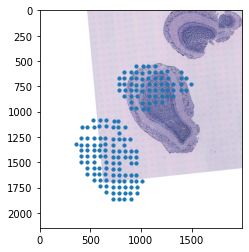

In [106]:
plt.imshow(img)
sf = 13
sf /= w_scale
plt.scatter(crd[:,0]*sf,crd[:,1]*sf,s= 10)

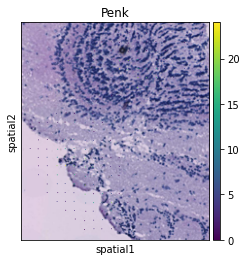

In [58]:
sc.pl.spatial(adata,color ="Penk",alpha =1,spot_size=0.1)